Enlace
https://aip.scitation.org/doi/10.1063/1.5125714
https://iopscience.iop.org/article/10.1088/1742-6596/285/1/012012/pdf

In [1]:
#librerías
import numpy as np
import matplotlib.pyplot as plt #gráficos
from scipy import interpolate #interpolación 1
from scipy.interpolate import griddata #interpolación 2
import h5py #archivos en hdf5
from jupyterlab_h5web import H5Web #librería
from pathlib import Path, PurePath #manejo de rutas y archivos

0.0026661745393015378
4166.764109879109


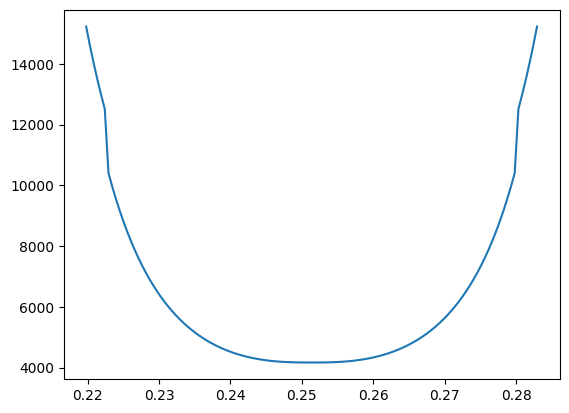

In [8]:
def clm(archivo_ne, archivo_Te) :
    ruta_archivo_ne = PurePath(Path(archivo_ne)) #archivo ne
    ruta_archivo_Te = PurePath(Path(archivo_Te)) #archivo Te
    n_e = np.loadtxt(ruta_archivo_ne)
    T_e = np.loadtxt(ruta_archivo_Te)
    n_i = n_e
    #print(np.mean(T_e))
    #cordenada r
    r = np.linspace(0.19893, 0.303797, 202)
    
    from scipy.constants import e, m_e, epsilon_0 #constantes físicas
    
    #Logaritmo de Coulomb - LC
    n_pasos = r.shape[0]
    LC = np.ndarray((n_pasos,), dtype=np.float64)
    for j in range(n_pasos):
        if T_e[j] > 10 :
            LC[j] = 24 - np.log( np.power((1e-6*n_e[j]), 0.5) / T_e[j] )
        else:
            LC[j] = 23 - np.log( np.power((1e-6*n_e[j]), 0.5) / np.power(T_e[j], 1.5) )
    
    lambda_may = np.exp(LC)
    #Longitud de Debye
    L_De_num = epsilon_0*T_e
    L_De_den = e*n_e
    L_De = np.sqrt( L_De_num / L_De_den )
    print(np.mean(L_De))
    
    #Camino libre medio
    clm_num = 48*np.sqrt(6/np.pi)*lambda_may*L_De
    clm_den = 9*LC
    clm = clm_num/ clm_den
    clm = np.nan_to_num(clm, copy=True, nan=0.0, posinf=None, neginf=None)
    
    #Grafico 1D
    plt.plot(r[40:-40],clm[40:-40])
    print(np.min(clm))
    return
    
    
clm('Densidad_col_ie.txt','Temperatura_col_ie.txt')